In [119]:
import xarray as xr
import numpy as np
import scipy as sc
import sklearn as skl
import skimage as ski
from scipy.linalg import norm
from scipy.spatial.distance import euclidean, jensenshannon, correlation
from scipy.stats import wasserstein_distance, ecdf
import skgstat as skg
import pysteps
from pysteps.verification.spatialscores import fss, intensity_scale
from pysteps.verification.salscores import sal
from pysteps.verification.detcontscores import det_cont_fct
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import copy
mpl.rcParams.update({'font.size': 12})


In [120]:
event_ID=0
##% REGION SELECTION
if event_ID==0:
    ###USA
    year=2020; month=np.arange(3,10); 
    latslice=slice(20,50); lonslice=slice(250,300)
    lon_conv=False
    flag='USA'
    tt1=29*2
    tt2=-31*2
elif event_ID==1:
    ###ARGENTINA
    year=2020; month=(9,10,11,12,1,2)
    latslice=slice(-40,-25); lonslice=slice(290,310)
    lon_conv=False
    flag='ARG'
    tt1=0
    tt2=-1
elif event_ID==2:
    ###AUSTRALIA
    year=2020; month=(9,10,11,12,1,2)
    latslice=slice(-35,-20); lonslice=slice(140,155)
    lon_conv=False
    flag='AUS'
    tt1=0
    tt2=-1
elif event_ID==3:
    ###CHINA
    year=2020; month=np.arange(4,10)
    latslice=slice(20,35); lonslice=slice(100,120)
    lon_conv=False
    flag='CHN'
    tt1=0
    tt2=-1
elif event_ID==4:
    ###EUROPE
    year=2020; month=np.arange(4,10)
    latslice=slice(35,55); lonslice=slice(-10,30)
    lon_conv=True
    flag='EUR'
    tt1=0
    tt2=-1

In [121]:
datapath='/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/MF_ML_PREDICT/season_2020_'+flag+'/'
models=['graphcast_','graphcast-oper_','pangu_','pangu-oper_','sfno_','sfno-oper_','ifs_']#'fcnv2_dawn','ifs']
labels=['graphcast','graphcast-oper','pangu','pangu-oper','sfno','sfno-oper','ifs']
references=[flag+'_era5_convseason_2020.nc',flag+'_init_convseason_2020.nc']
rlabels=['era5','ifs-init']
figpath='/users/mfeldman/figs/pub/'+flag+'_rev_'
c1='#648fff' #lightblue
c2='#785ef0' #indigo
c3='#dc267f' #magenta
c4='#fe6100' #orange
c5='#ffb000' #gold
c6='#000000' #black
c7='#f3322f' #red
colors=[c2,c1,c3,c7,c4,c5,c6]#c5
title=['North America','Argentina','Australia','Southeastern China','Europe']


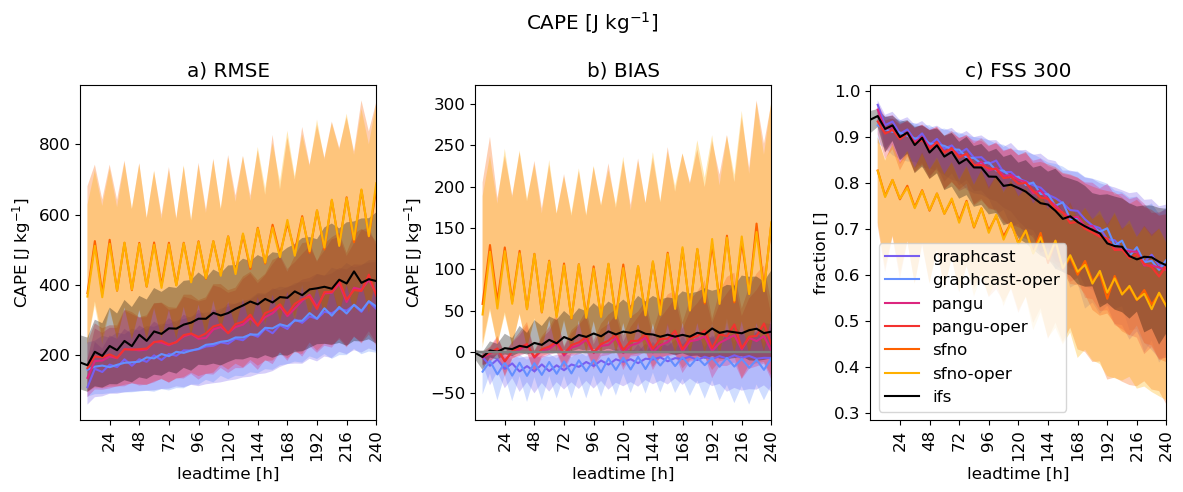

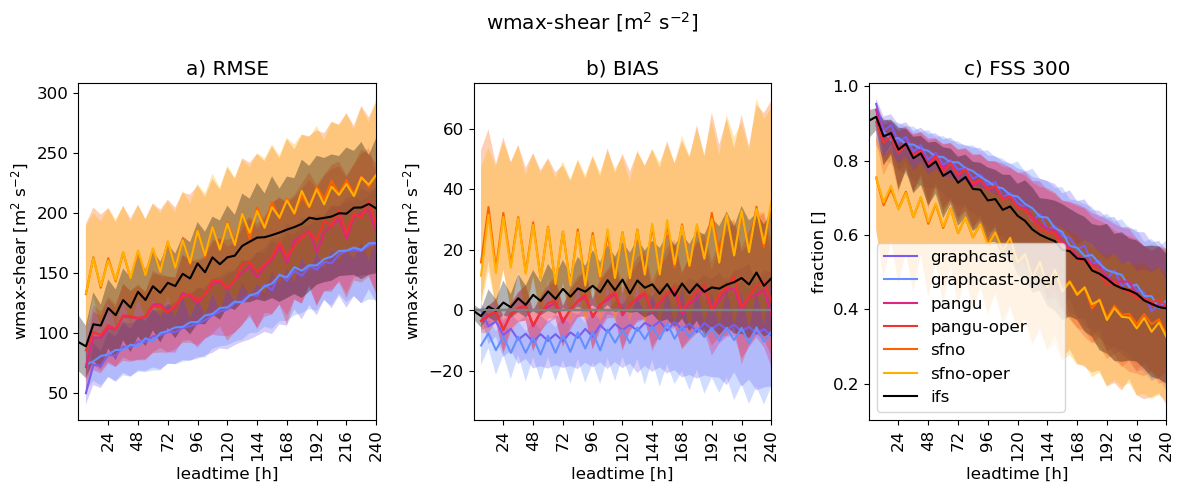

In [122]:
iis=[1,1,1,1,1,1,0]

for mm in range(2)[:]:
    var=['cape','wms'][mm]
    tit=['CAPE [J kg$^{-1}$]','wmax-shear [m$^2$ s$^{-2}$]'][mm]
    l1=[300,300][mm]
    l2=[1000,500][mm]
    f1=[1,1,1,1,1][mm]
    fig,axes = plt.subplots(1,3,figsize=(12, 5))
    for nn in range(len(models))[:]:
        ii=iis[nn]
        model=models[nn]
        color=colors[nn]
        label=labels[nn]
        file=glob(datapath+model+var+'_eval_scores_lsm.nc')[0]
        scores=xr.open_dataset(file)#,engine='netcdf4')

        sal_s=scores.structure
        sal_a=scores.amplitude
        sal_l=scores.location

        rmse=scores.rmse
        bias=scores.bias
        fss_eval_300=scores.fss_low
        fss_eval_1000=scores.fss_high

        dt=scores.date
        ldt=len(scores.leadtime)

        
        

        axes[0].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(rmse,axis=1),c=color)
        axes[0].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(rmse,75,axis=1),
                              np.nanpercentile(rmse,25,axis=1),facecolor=color,alpha=0.3)
        axes[0].set_title('a) RMSE')
        axes[0].set_xlabel('leadtime [h]')
        axes[0].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
        axes[0].set_ylabel(tit)
        axes[0].set_xlim([0,240])
        
        axes[1].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(bias,axis=1),c=color)
        axes[1].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(bias,75,axis=1),
                              np.nanpercentile(bias,25,axis=1),facecolor=color,alpha=0.3)
        axes[1].set_title('b) BIAS')
        axes[1].plot([0,240],np.zeros(2),c='grey')
        axes[1].set_xlabel('leadtime [h]')
        axes[1].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
        axes[1].set_ylabel(tit)
        axes[1].set_xlim([0,240])

        axes[2].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(fss_eval_300,axis=1),c=color,label=label)
        axes[2].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(fss_eval_300,75,axis=1),
                              np.nanpercentile(fss_eval_300,25,axis=1),facecolor=color,alpha=0.3)
        axes[2].set_title('c) FSS '+str(l1))
        axes[2].set_xlabel('leadtime [h]')
        axes[2].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
        axes[2].set_ylabel('fraction []')
        axes[2].set_xlim([0,240])
        axes[2].legend()
        fig.suptitle(tit)
    
    
    
    fig.tight_layout()
    fig.show()
    fig.savefig(figpath+var+'_sum_scores_prctl_all.png')


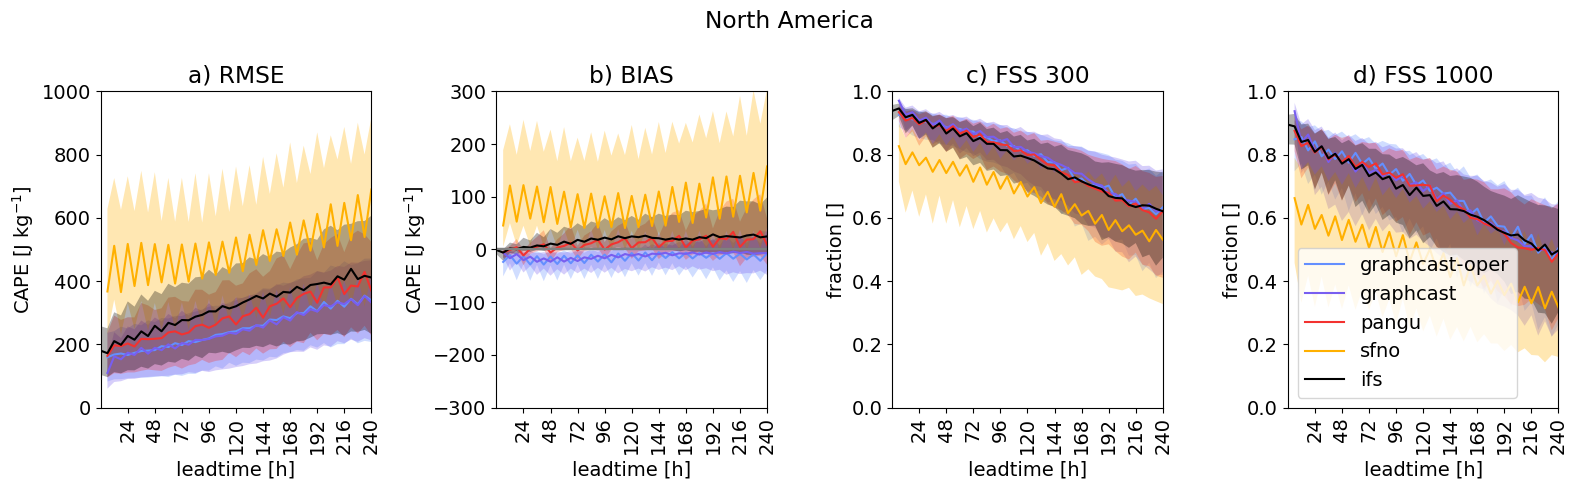

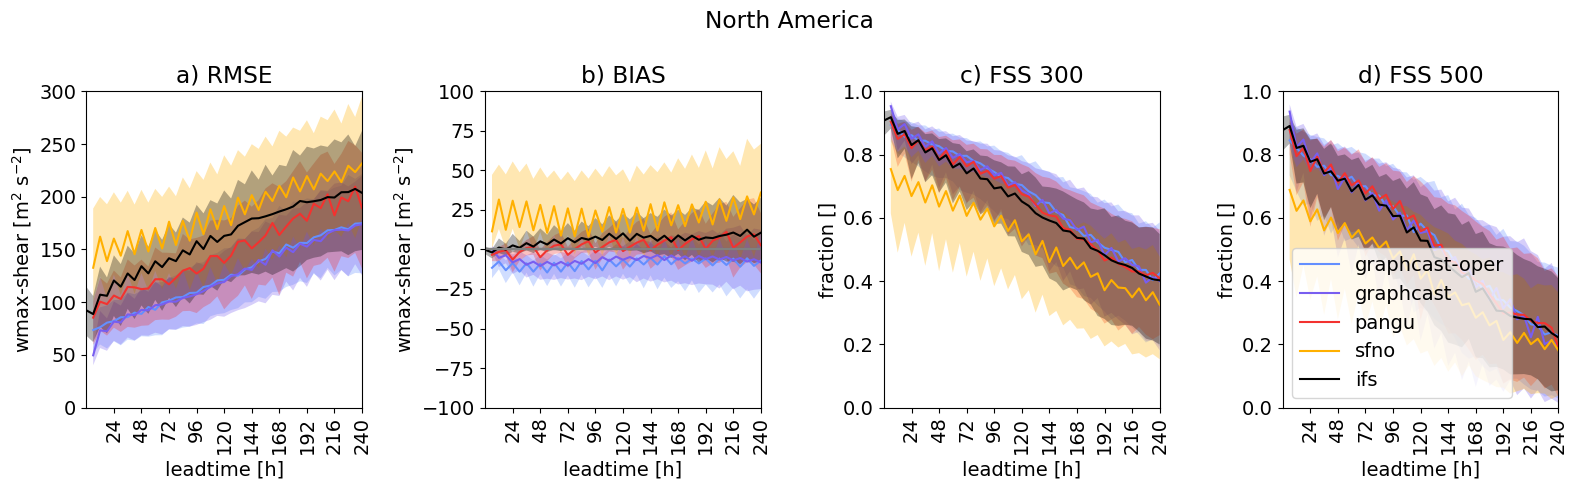

In [123]:
datapath='/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/MF_ML_PREDICT/season_2020_'+flag+'/'
models=['graphcast-oper_','graphcast_','pangu-oper_','sfno-oper_','ifs_']#'fcnv2_dawn','ifs']
labels=['graphcast-oper','graphcast','pangu','sfno','ifs']
references=[flag+'_era5_convseason_2020.nc',flag+'_init_convseason_2020.nc']
rlabels=['era5','ifs-init']
#figpath='/users/mfeldman/figs/pub/'+flag+'_rev_'
c1='#648fff' #lightblue
c2='#785ef0' #indigo
c3='#dc267f' #magenta
c4='#fe6100' #orange
c5='#ffb000' #gold
c6='#000000' #black
c7='#f3322f' #red
colors=[c1,c2,c7,c5,c6]#c5
mpl.rcParams.update({'font.size': 14})
lid=[0,2,3,0,1][event_ID]
iis=[1,1,1,1,0]
aa=['a) ','e) ','i) ','m) '][lid]
bb=['b) ','f) ','j) ','n) '][lid]
cc=['c) ','g) ','k) ','o) '][lid]
dd=['d) ','h) ','l) ','p) '][lid]

for mm in range(2)[:]:
    var=['cape','wms'][mm]
    tit=['CAPE [J kg$^{-1}$]','wmax-shear [m$^2$ s$^{-2}$]'][mm]
    l1=[300,300][mm]
    l2=[1000,500][mm]
    f1=[1,1,1,1,1][mm]
    a=[1000,300][mm]
    b=[300,100][mm]
    fig,axes = plt.subplots(1,4,figsize=(16, 5))
    for nn in range(len(models))[:]:
        ii=iis[nn]
        model=models[nn]
        color=colors[nn]
        label=labels[nn]
        file=glob(datapath+model+var+'_eval_scores_lsm.nc')[0]
        scores=xr.open_dataset(file)#,engine='netcdf4')

        sal_s=scores.structure
        sal_a=scores.amplitude
        sal_l=scores.location

        rmse=scores.rmse
        bias=scores.bias
        fss_eval_300=scores.fss_low
        fss_eval_1000=scores.fss_high

        dt=scores.date
        ldt=len(scores.leadtime)

        
        

        axes[0].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(rmse,axis=1),c=color)
        axes[0].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(rmse,75,axis=1),
                              np.nanpercentile(rmse,25,axis=1),facecolor=color,alpha=0.3)
        axes[0].set_title(aa+'RMSE')
        axes[0].set_xlabel('leadtime [h]')
        axes[0].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
        axes[0].set_ylabel(tit)
        axes[0].set_ylim([0,a])
        axes[0].set_xlim([0,240])
        axes[1].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(bias,axis=1),c=color)
        axes[1].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(bias,75,axis=1),
                              np.nanpercentile(bias,25,axis=1),facecolor=color,alpha=0.3)
        axes[1].set_title(bb+'BIAS')
        axes[1].plot([0,240],np.zeros(2),c='grey')
        axes[1].set_xlabel('leadtime [h]')
        axes[1].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
        axes[1].set_ylabel(tit)
        axes[1].set_ylim([-b,b])
        axes[1].set_xlim([0,240])

        axes[2].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(fss_eval_300,axis=1),c=color,label=label)
        axes[2].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(fss_eval_300,75,axis=1),
                              np.nanpercentile(fss_eval_300,25,axis=1),facecolor=color,alpha=0.3)
        axes[2].set_title(cc+'FSS '+str(l1))
        axes[2].set_xlabel('leadtime [h]')
        axes[2].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
        axes[2].set_ylabel('fraction []')
        axes[2].set_ylim([0,1])
        axes[2].set_xlim([0,240])

        axes[3].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(fss_eval_1000,axis=1),c=color,label=label)
        axes[3].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(fss_eval_1000,75,axis=1),
                              np.nanpercentile(fss_eval_1000,25,axis=1),facecolor=color,alpha=0.3)
        axes[3].set_title(dd+'FSS '+str(l2))
        axes[3].set_xlabel('leadtime [h]')
        axes[3].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
        axes[3].set_ylabel('fraction []')
        axes[3].set_ylim([0,1])
        axes[3].set_xlim([0,240])
        if event_ID==0: axes[3].legend()
        fig.suptitle(title[event_ID])
    
    
    
    fig.tight_layout()
    fig.show()
    fig.savefig(figpath+var+'_sum_scores_prctl_red.png')


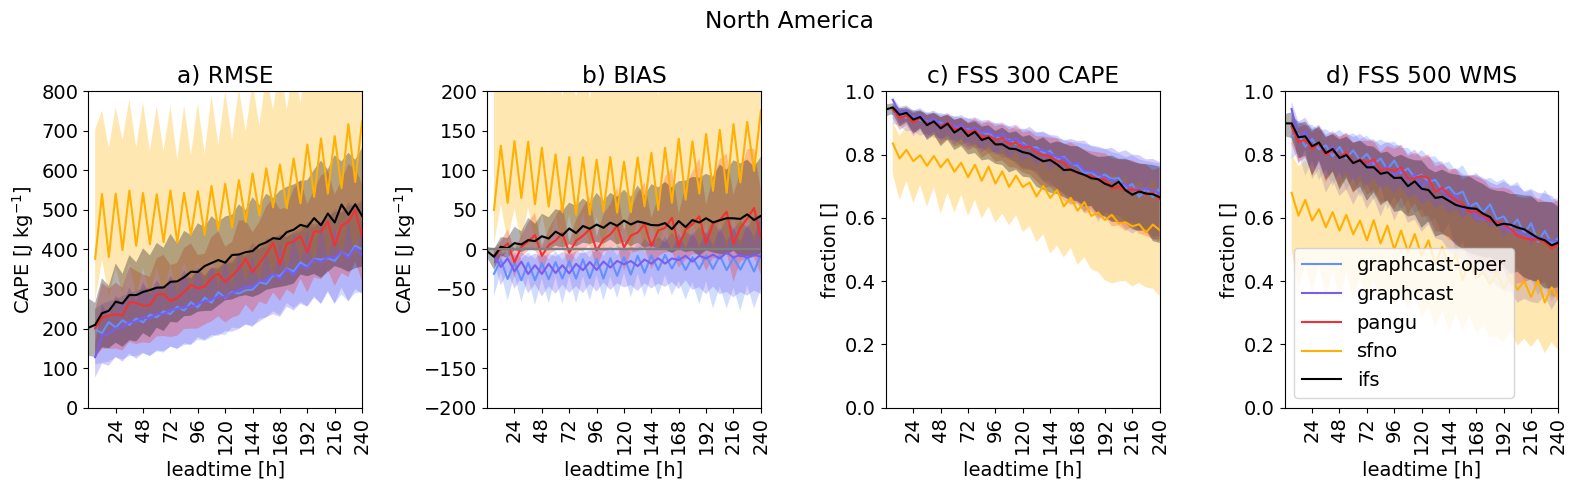

In [124]:
datapath='/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/MF_ML_PREDICT/season_2020_'+flag+'/'
models=['graphcast-oper_','graphcast_','pangu-oper_','sfno-oper_','ifs_']#'fcnv2_dawn','ifs']
labels=['graphcast-oper','graphcast','pangu','sfno','ifs']
references=[flag+'_era5_convseason_2020.nc',flag+'_init_convseason_2020.nc']
rlabels=['era5','ifs-init']
#figpath='/users/mfeldman/figs/pub/'+flag+'_rev_'
c1='#648fff' #lightblue
c2='#785ef0' #indigo
c3='#dc267f' #magenta
c4='#fe6100' #orange
c5='#ffb000' #gold
c6='#000000' #black
c7='#f3322f' #red
colors=[c1,c2,c7,c5,c6]#c5
mpl.rcParams.update({'font.size': 14})
lid=[0,2,3,0,1][event_ID]
iis=[1,1,1,1,0]
aa=['a) ','e) ','i) ','m) '][lid]
bb=['b) ','f) ','j) ','n) '][lid]
cc=['c) ','g) ','k) ','o) '][lid]
dd=['d) ','h) ','l) ','p) '][lid]

for mm in range(1)[:]:
    var=['cape','wms'][mm]
    tit=['CAPE [J kg$^{-1}$]','wmax-shear [m$^2$ s$^{-2}$]'][mm]
    l1=[300,300][mm]
    l2=[1000,500][mm]
    f1=[1,1,1,1,1][mm]
    a=[800,300][mm]
    b=[200,100][mm]
    fig,axes = plt.subplots(1,4,figsize=(16, 5))
    for nn in range(len(models))[:]:
        ii=iis[nn]
        model=models[nn]
        color=colors[nn]
        label=labels[nn]
        file=glob(datapath+model+'cape_eval_scores_lsm.nc')[0]
        scores=xr.open_dataset(file)#,engine='netcdf4')

        sal_s=scores.structure[:,tt1:tt2]
        sal_a=scores.amplitude[:,tt1:tt2]
        sal_l=scores.location[:,tt1:tt2]

        rmse=scores.rmse[:,tt1:tt2]
        bias=scores.bias[:,tt1:tt2]
        fss_eval_300=scores.fss_low[:,tt1:tt2]
        fss_eval_1000=scores.fss_high[:,tt1:tt2]

        file2=glob(datapath+model+'wms_eval_scores_lsm.nc')[0]
        scores2=xr.open_dataset(file)#,engine='netcdf4')
        fss_eval_300_wms=scores2.fss_high[:,tt1:tt2]

        dt=scores.date
        ldt=len(scores.leadtime)

        
        

        axes[0].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(rmse,axis=1),c=color)
        axes[0].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(rmse,75,axis=1),
                              np.nanpercentile(rmse,25,axis=1),facecolor=color,alpha=0.3)
        axes[0].set_title(aa+'RMSE')
        axes[0].set_xlabel('leadtime [h]')
        axes[0].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
        axes[0].set_ylabel(tit)
        axes[0].set_ylim([0,a])
        axes[0].set_xlim([0,240])
        axes[1].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(bias,axis=1),c=color)
        axes[1].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(bias,75,axis=1),
                              np.nanpercentile(bias,25,axis=1),facecolor=color,alpha=0.3)
        axes[1].set_title(bb+'BIAS')
        axes[1].plot([0,240],np.zeros(2),c='grey')
        axes[1].set_xlabel('leadtime [h]')
        axes[1].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
        axes[1].set_ylabel(tit)
        axes[1].set_ylim([-b,b])
        axes[1].set_xlim([0,240])

        axes[2].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(fss_eval_300,axis=1),c=color,label=label)
        axes[2].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(fss_eval_300,75,axis=1),
                              np.nanpercentile(fss_eval_300,25,axis=1),facecolor=color,alpha=0.3)
        axes[2].set_title(cc+'FSS '+str(l1)+' CAPE')
        axes[2].set_xlabel('leadtime [h]')
        axes[2].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
        axes[2].set_ylabel('fraction []')
        axes[2].set_ylim([0,1])
        axes[2].set_xlim([0,240])

        axes[3].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(fss_eval_300_wms,axis=1),c=color,label=label)
        axes[3].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(fss_eval_300_wms,75,axis=1),
                              np.nanpercentile(fss_eval_300_wms,25,axis=1),facecolor=color,alpha=0.3)
        axes[3].set_title(dd+'FSS 500 WMS')
        axes[3].set_xlabel('leadtime [h]')
        axes[3].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
        axes[3].set_ylabel('fraction []')
        axes[3].set_ylim([0,1])
        axes[3].set_xlim([0,240])
        if event_ID==0: axes[3].legend()
        fig.suptitle(title[event_ID])
    
    
    
    fig.tight_layout()
    fig.show()
    fig.savefig(figpath+var+'_wms_sum_scores_prctl_comb.png')


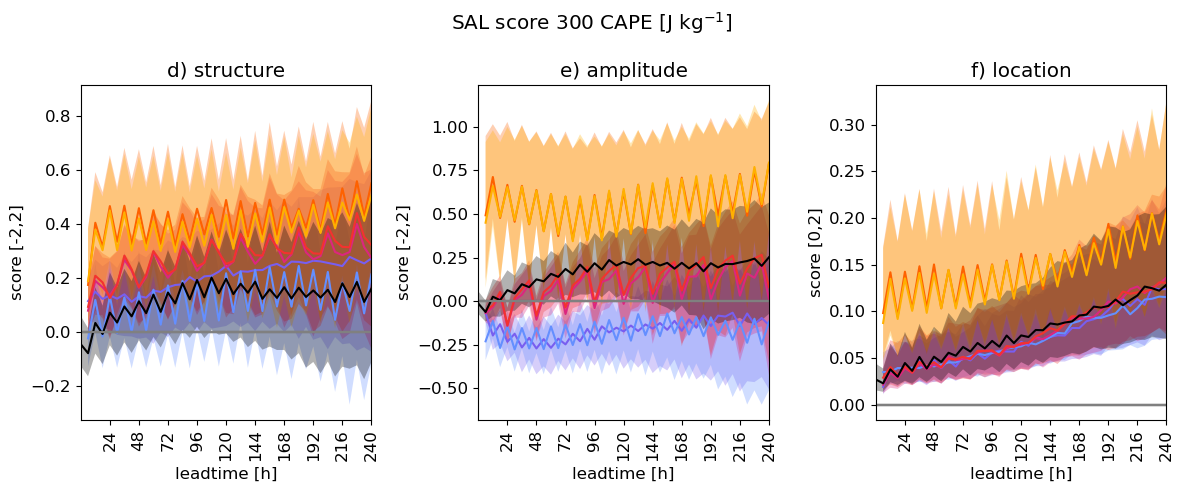

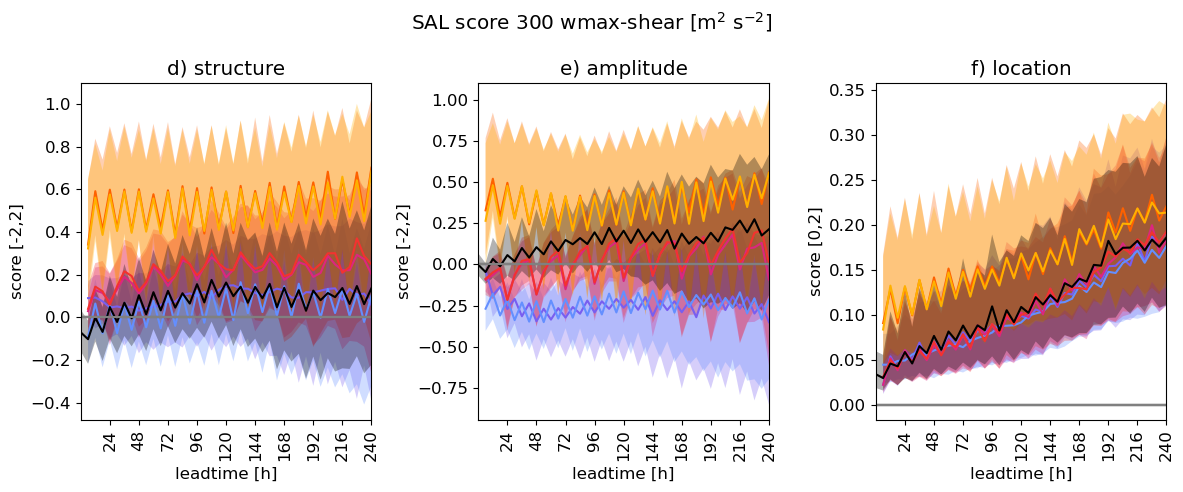

In [125]:
datapath='/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/MF_ML_PREDICT/season_2020_'+flag+'/'
models=['graphcast_','graphcast-oper_','pangu_','pangu-oper_','sfno_','sfno-oper_','ifs_']#'fcnv2_dawn','ifs']
labels=['graphcast','graphcast-oper','pangu','pangu-oper','sfno','sfno-oper','ifs']
references=[flag+'_era5_convseason_2020.nc',flag+'_init_convseason_2020.nc']
rlabels=['era5','ifs-init']
#figpath='/users/mfeldman/figs/pub/'+flag+'_'
c1='#648fff' #lightblue
c2='#785ef0' #indigo
c3='#dc267f' #magenta
c4='#fe6100' #orange
c5='#ffb000' #gold
c6='#000000' #black
c7='#f3322f' #red
colors=[c2,c1,c3,c7,c4,c5,c6]#c5
mpl.rcParams.update({'font.size': 12})
iis=[1,1,1,1,1,1,0]
for mm in range(2)[:]:
    var=['cape','wms'][mm]
    tit=['CAPE [J kg$^{-1}$]','wmax-shear [m$^2$ s$^{-2}$]'][mm]
    l1=[300,300][mm]
    l2=[1000,500][mm]
    f1=[1,1][mm]
    fig2,axes2 = plt.subplots(1,3,figsize=(12, 5))
    for nn in range(len(models))[:]:
        ii=iis[nn]
        model=models[nn]
        color=colors[nn]
        label=labels[nn]
        file=glob(datapath+model+var+'_eval_scores_lsm.nc')[0]
        scores=xr.open_dataset(file)#,engine='netcdf4')

        sal_s=scores.structure
        sal_a=scores.amplitude
        sal_l=scores.location

        rmse=scores.rmse
        bias=scores.bias
        fss_eval_300=scores.fss_low
        fss_eval_1000=scores.fss_high

        dt=scores.date
        ldt=len(scores.leadtime)

        axes2[0].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(sal_s,axis=1),c=color,label=label)
        axes2[0].plot([0,240],np.zeros(2),c='grey')
        axes2[0].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(sal_s,75,axis=1),
                              np.nanpercentile(sal_s,25,axis=1),facecolor=color,alpha=0.3)
        axes2[0].set_title('d) structure')
        axes2[0].set_xlabel('leadtime [h]')
        axes2[0].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
        axes2[0].set_ylabel('score [-2,2]')
        axes2[0].set_xlim([0,240])

        #axes2[0].legend()
        axes2[1].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(sal_a,axis=1),c=color,label=label)
        axes2[1].plot([0,240],np.zeros(2),c='grey')
        axes2[1].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(sal_a,75,axis=1),
                              np.nanpercentile(sal_a,25,axis=1),facecolor=color,alpha=0.3)
        axes2[1].set_title('e) amplitude')
        axes2[1].set_xlabel('leadtime [h]')
        axes2[1].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
        axes2[1].set_ylabel('score [-2,2]')
        axes2[1].set_xlim([0,240])

        #axes2[1].legend()
        axes2[2].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(sal_l,axis=1),c=color)
        axes2[2].plot([0,240],np.zeros(2),c='grey')
        axes2[2].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(sal_l,75,axis=1),
                              np.nanpercentile(sal_l,25,axis=1),facecolor=color,alpha=0.3)
        axes2[2].set_title('f) location')
        axes2[2].set_xlabel('leadtime [h]')
        axes2[2].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
        axes2[2].set_ylabel('score [0,2]')
        axes2[2].set_xlim([0,240])
    
        fig2.suptitle('SAL score '+str(l1)+' '+tit)
    
    
    
    
    fig2.tight_layout()
    fig2.show()
    fig2.savefig(figpath+var+'_sal_scores_prctl.png')



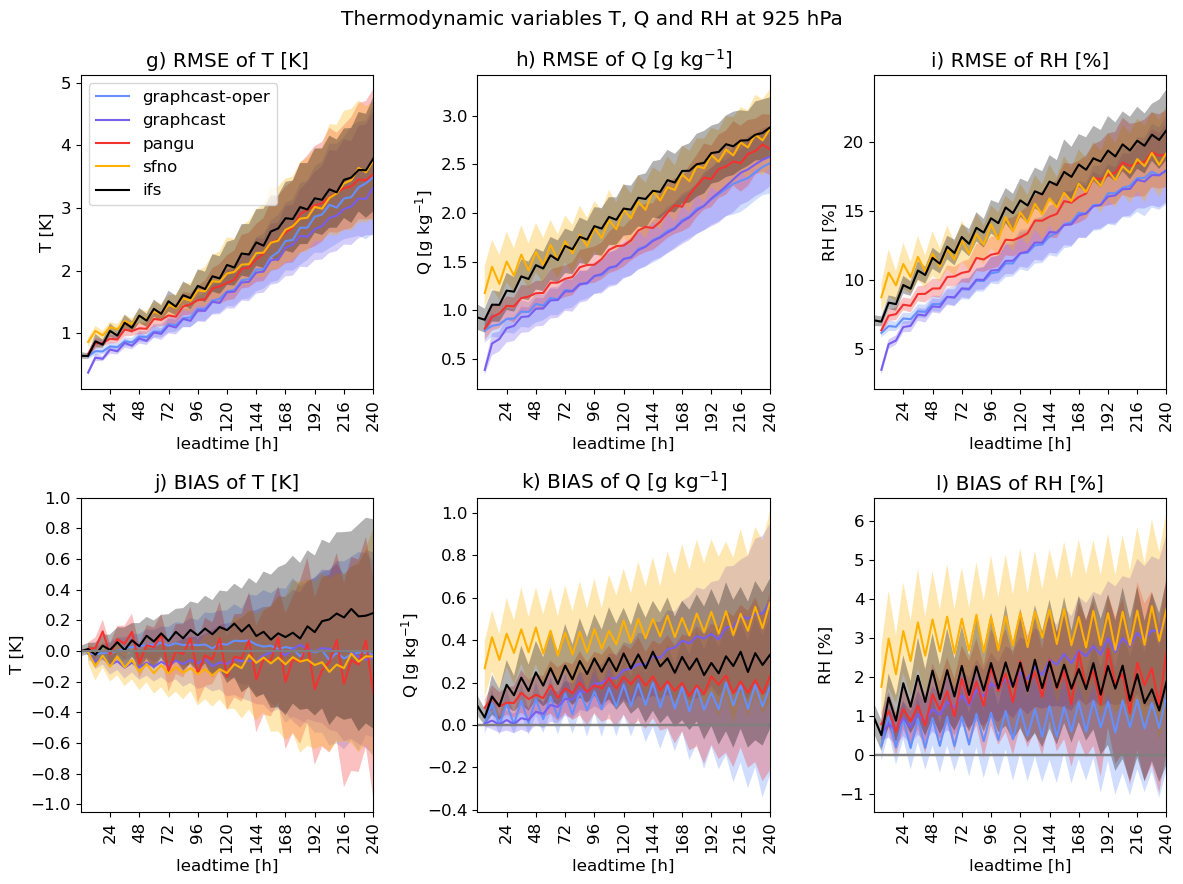

In [126]:
datapath='/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/MF_ML_PREDICT/season_2020_'+flag+'/'
models=['graphcast-oper_','graphcast_','pangu-oper_','sfno-oper_','ifs_']#'fcnv2_dawn','ifs']
labels=['graphcast-oper','graphcast','pangu','sfno','ifs']
references=[flag+'_era5_convseason_2020.nc',flag+'_init_convseason_2020.nc']
rlabels=['era5','ifs-init']
#figpath='/users/mfeldman/figs/pub/'+flag+'_'
c1='#648fff' #lightblue
c2='#785ef0' #indigo
c3='#dc267f' #magenta
c4='#fe6100' #orange
c5='#ffb000' #gold
c6='#000000' #black
c7='#f3322f' #red
colors=[c1,c2,c7,c5,c6]#c5


iis=[1,1,1,1,0]
fig2,axes2 = plt.subplots(2,3,figsize=(12, 9))
for mm in range(3)[:]:
    var=['t925','q925','r925'][mm]
    tit=['T [K]','Q [g kg$^{-1}$]','RH [%]'][mm]
    a=['g) ','h) ','i) '][mm]
    b=['j) ','k) ','l) '][mm]
    l1=[283,0.01,50][mm]
    l2=[293,0.05,90][mm]
    f1=[1,1,1][mm]
    
    for nn in range(len(models))[:]:
        
        ii=iis[nn]
        model=models[nn]
        color=colors[nn]
        label=labels[nn]
        file=glob(datapath+model+var+'_eval_scores.nc')[0]
        scores=xr.open_dataset(file)#,engine='netcdf4')
        #if nn==3: scores=scores/10

        sal_s=scores.structure
        sal_a=scores.amplitude
        sal_l=scores.location

        rmse=scores.rmse
        bias=scores.bias
        fss_eval_300=scores.fss_low
        fss_eval_1000=scores.fss_high

        if mm==1:
            rmse=rmse*1000
            bias=bias*1000

        dt=scores.date
        ldt=len(scores.leadtime)

        
        

        axes2[0,mm].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(rmse,axis=1),c=color,label=label)
        axes2[0,mm].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(rmse,75,axis=1),
                              np.nanpercentile(rmse,25,axis=1),facecolor=color,alpha=0.3)
        axes2[0,mm].set_title(a+'RMSE of '+tit)
        axes2[0,mm].set_xlabel('leadtime [h]')
        axes2[0,mm].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
        axes2[0,mm].set_ylabel(tit)
        axes2[0,mm].set_xlim([0,240])

        axes2[1,mm].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(bias,axis=1),c=color,label=label)
        axes2[1,mm].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(bias,75,axis=1),
                              np.nanpercentile(bias,25,axis=1),facecolor=color,alpha=0.3)
        axes2[1,mm].set_title(b+'BIAS of '+tit)
        axes2[1,mm].plot([0,240],np.zeros(2),c='grey')
        axes2[1,mm].set_xlabel('leadtime [h]')
        axes2[1,mm].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
        axes2[1,mm].set_ylabel(tit)
        axes2[1,mm].set_xlim([0,240])
        if mm==0:
            axes2[0,mm].legend()
            axes2[1,mm].set_yticks(np.arange(-1,1.1,0.2))
        fig2.suptitle('Thermodynamic variables T, Q and RH at 925 hPa')
    
    

    fig2.tight_layout()
    fig2.show()
    fig2.savefig(figpath+'_scores_prctl_red.png')


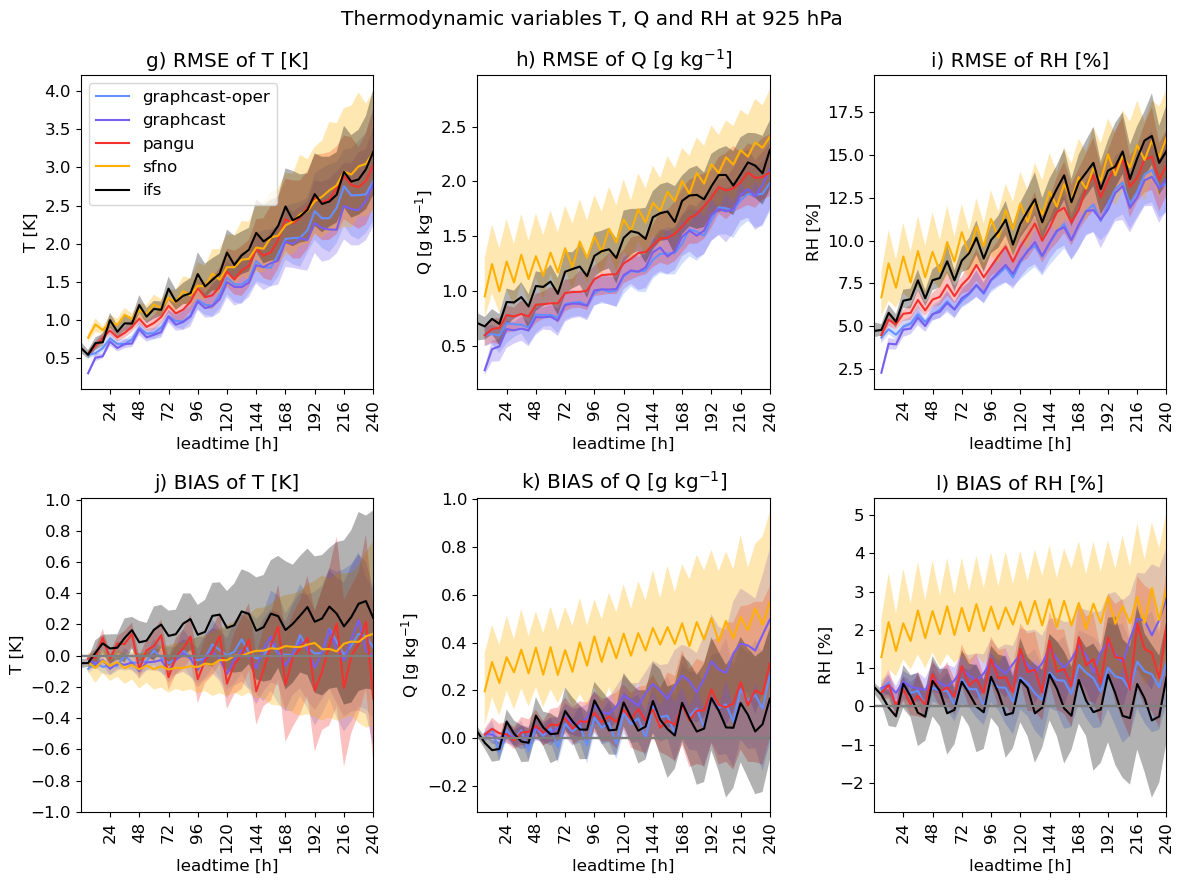

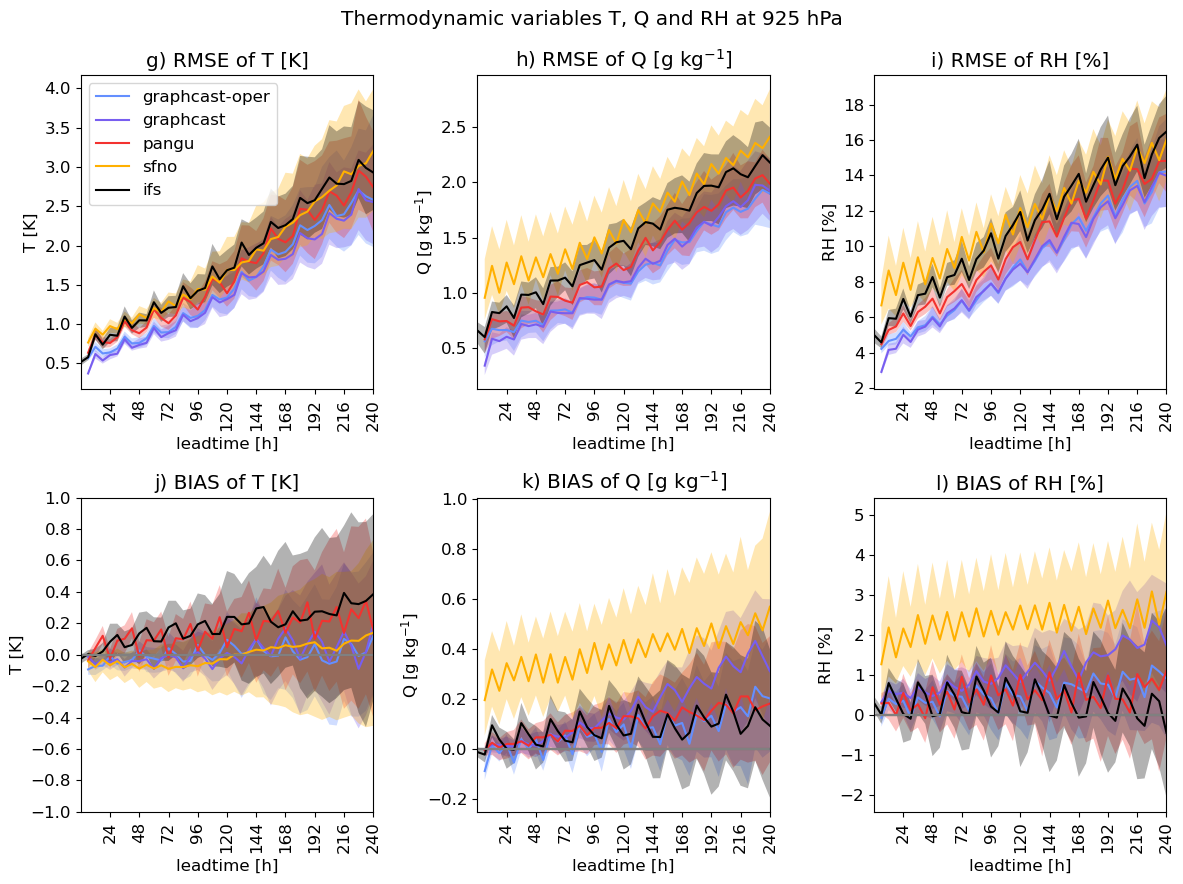

In [127]:
datapath='/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/MF_ML_PREDICT/season_2020_'+flag+'/'
models=['graphcast-oper_','graphcast_','pangu-oper_','sfno-oper_','ifs_']#'fcnv2_dawn','ifs']
labels=['graphcast-oper','graphcast','pangu','sfno','ifs']
references=[flag+'_era5_convseason_2020.nc',flag+'_init_convseason_2020.nc']
rlabels=['era5','ifs-init']
#figpath='/users/mfeldman/figs/pub/'+flag+'_'
c1='#648fff' #lightblue
c2='#785ef0' #indigo
c3='#dc267f' #magenta
c4='#fe6100' #orange
c5='#ffb000' #gold
c6='#000000' #black
c7='#f3322f' #red
colors=[c1,c2,c7,c5,c6]#c5


iis=[1,1,1,1,0]
times=[0,12]
for tt in range(len(times)):
    fig2,axes2 = plt.subplots(2,3,figsize=(12, 9))
    for mm in range(3)[:]:
        var=['t925','q925','r925'][mm]
        tit=['T [K]','Q [g kg$^{-1}$]','RH [%]'][mm]
        a=['g) ','h) ','i) '][mm]
        b=['j) ','k) ','l) '][mm]
        l1=[283,0.01,50][mm]
        l2=[293,0.05,90][mm]
        f1=[1,1,1][mm]
        
        for nn in range(len(models))[:]:
            
            ii=iis[nn]
            model=models[nn]
            color=colors[nn]
            label=labels[nn]
            file=glob(datapath+model+var+'_eval_scores_lsm.nc')[0]
            scores=xr.open_dataset(file)#,engine='netcdf4')
            #if nn==3: scores=scores/10

            sal_s=scores.structure[:,tt1+tt:tt2:2]
            sal_a=scores.amplitude[:,tt1+tt:tt2:2]
            sal_l=scores.location[:,tt1+tt:tt2:2]

            rmse=scores.rmse[:,tt1+tt:tt2:2]
            bias=scores.bias[:,tt1+tt:tt2:2]
            fss_eval_300=scores.fss_low[:,tt1+tt:tt2:2]
            fss_eval_1000=scores.fss_high[:,tt1+tt:tt2:2]

            if mm==1:
                rmse=rmse*1000
                bias=bias*1000

            dt=scores.date
            ldt=len(scores.leadtime)

            
            

            axes2[0,mm].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(rmse,axis=1),c=color,label=label)
            axes2[0,mm].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(rmse,75,axis=1),
                                np.nanpercentile(rmse,25,axis=1),facecolor=color,alpha=0.3)
            axes2[0,mm].set_title(a+'RMSE of '+tit)
            axes2[0,mm].set_xlabel('leadtime [h]')
            axes2[0,mm].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
            axes2[0,mm].set_ylabel(tit)
            axes2[0,mm].set_xlim([0,240])

            axes2[1,mm].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(bias,axis=1),c=color,label=label)
            axes2[1,mm].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(bias,75,axis=1),
                                np.nanpercentile(bias,25,axis=1),facecolor=color,alpha=0.3)
            axes2[1,mm].set_title(b+'BIAS of '+tit)
            axes2[1,mm].plot([0,240],np.zeros(2),c='grey')
            axes2[1,mm].set_xlabel('leadtime [h]')
            axes2[1,mm].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
            axes2[1,mm].set_ylabel(tit)
            axes2[1,mm].set_xlim([0,240])
            if mm==0:
                axes2[0,mm].legend()
                axes2[1,mm].set_yticks(np.arange(-1,1.1,0.2))
            fig2.suptitle('Thermodynamic variables T, Q and RH at 925 hPa')
        
        

        fig2.tight_layout()
        fig2.show()
        fig2.savefig(figpath+str(times[tt]).zfill(2)+'h_TD_scores_prctl_red.png')


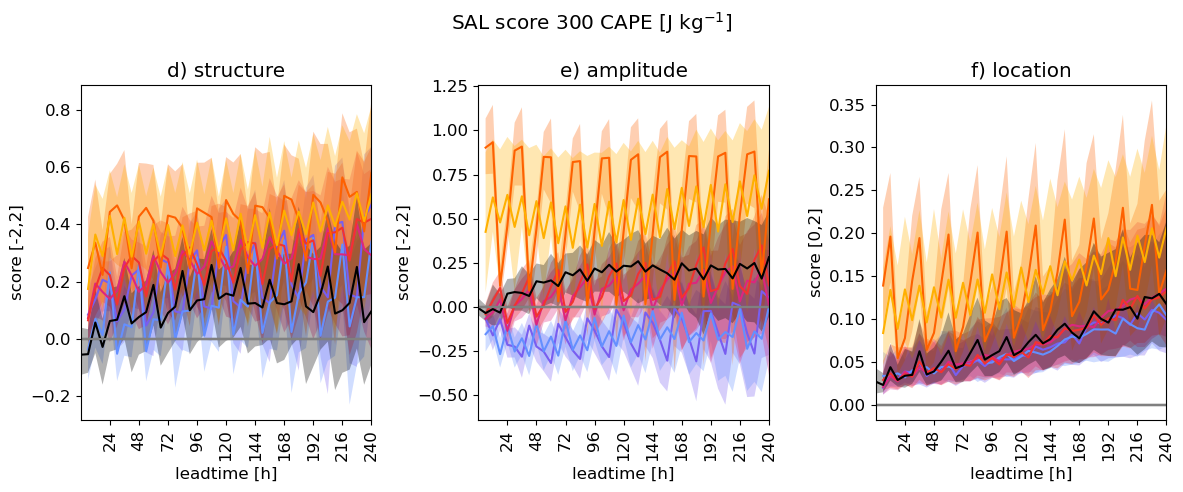

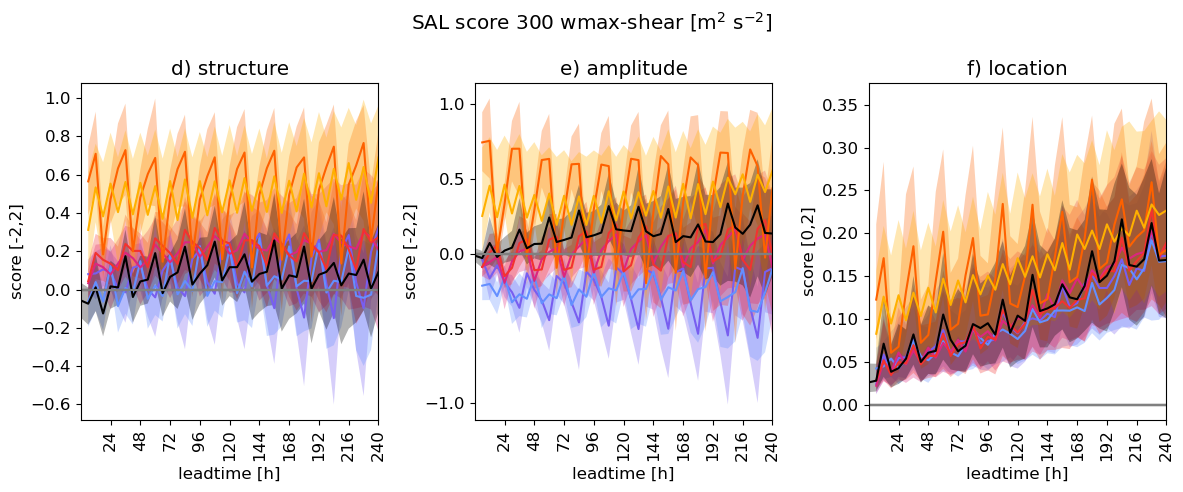

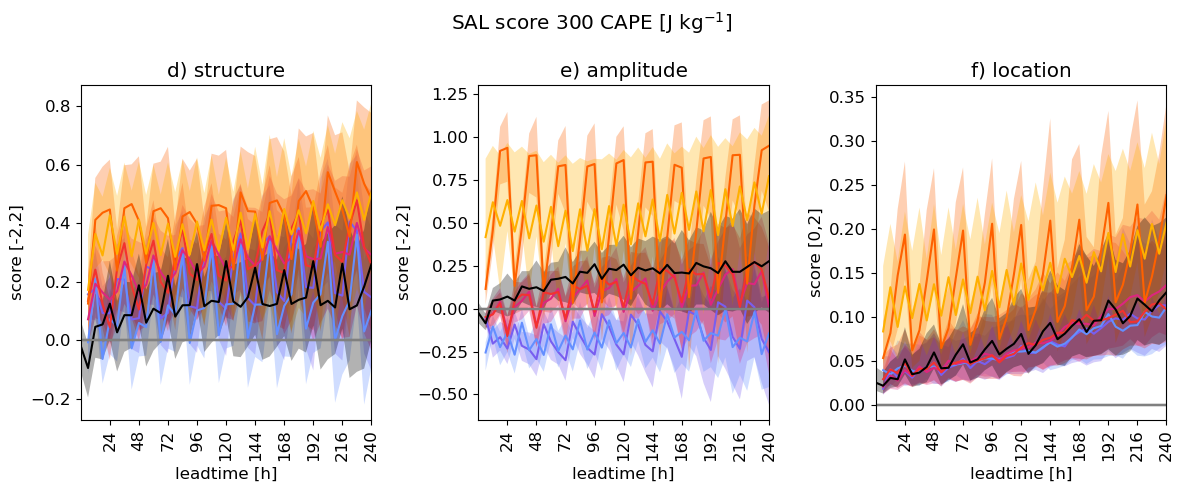

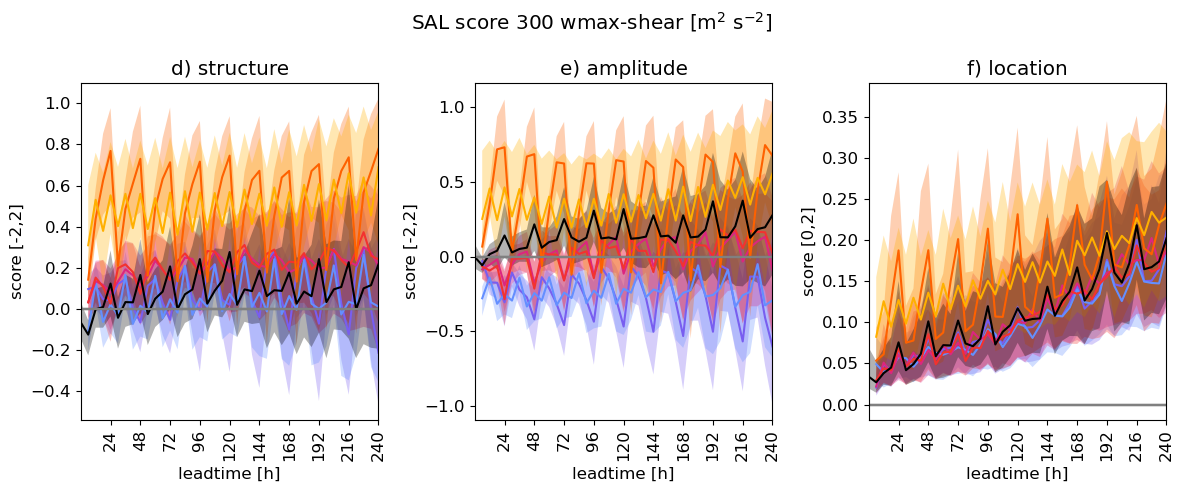

In [128]:
datapath='/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/MF_ML_PREDICT/season_2020_'+flag+'/'
models=['graphcast_','graphcast-oper_','pangu_','pangu-oper_','sfno_','sfno-oper_','ifs_']#'fcnv2_dawn','ifs']
labels=['graphcast','graphcast-oper','pangu','pangu-oper','sfno','sfno-oper','ifs']
references=[flag+'_era5_convseason_2020.nc',flag+'_init_convseason_2020.nc']
rlabels=['era5','ifs-init']
#figpath='/users/mfeldman/figs/pub/'+flag+'_'
c1='#648fff' #lightblue
c2='#785ef0' #indigo
c3='#dc267f' #magenta
c4='#fe6100' #orange
c5='#ffb000' #gold
c6='#000000' #black
c7='#f3322f' #red
colors=[c2,c1,c3,c7,c4,c5,c6]#c5
mpl.rcParams.update({'font.size': 12})
iis=[1,1,1,1,1,1,0]
times=[0,12]
for tt in range(len(times)):
    for mm in range(2)[:]:
        var=['cape','wms'][mm]
        tit=['CAPE [J kg$^{-1}$]','wmax-shear [m$^2$ s$^{-2}$]'][mm]
        l1=[300,300][mm]
        l2=[1000,500][mm]
        f1=[1,1][mm]
        fig2,axes2 = plt.subplots(1,3,figsize=(12, 5))
        for nn in range(len(models))[:]:
            ii=iis[nn]
            model=models[nn]
            color=colors[nn]
            label=labels[nn]
            file=glob(datapath+model+var+'_eval_scores_lsm.nc')[0]
            scores=xr.open_dataset(file)#,engine='netcdf4')

            sal_s=scores.structure[:,tt1+tt:tt2:2]
            sal_a=scores.amplitude[:,tt1+tt:tt2:2]
            sal_l=scores.location[:,tt1+tt:tt2:2]

            rmse=scores.rmse[:,tt1+tt:tt2:2]
            bias=scores.bias[:,tt1+tt:tt2:2]
            fss_eval_300=scores.fss_low[:,tt1+tt:tt2:2]
            fss_eval_1000=scores.fss_high[:,tt1+tt:tt2:2]

            dt=scores.date
            ldt=len(scores.leadtime)

            axes2[0].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(sal_s,axis=1),c=color,label=label)
            axes2[0].plot([0,240],np.zeros(2),c='grey')
            axes2[0].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(sal_s,75,axis=1),
                                np.nanpercentile(sal_s,25,axis=1),facecolor=color,alpha=0.3)
            axes2[0].set_title('d) structure')
            axes2[0].set_xlabel('leadtime [h]')
            axes2[0].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
            axes2[0].set_ylabel('score [-2,2]')
            axes2[0].set_xlim([0,240])

            #axes2[0].legend()
            axes2[1].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(sal_a,axis=1),c=color,label=label)
            axes2[1].plot([0,240],np.zeros(2),c='grey')
            axes2[1].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(sal_a,75,axis=1),
                                np.nanpercentile(sal_a,25,axis=1),facecolor=color,alpha=0.3)
            axes2[1].set_title('e) amplitude')
            axes2[1].set_xlabel('leadtime [h]')
            axes2[1].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
            axes2[1].set_ylabel('score [-2,2]')
            axes2[1].set_xlim([0,240])

            #axes2[1].legend()
            axes2[2].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(sal_l,axis=1),c=color)
            axes2[2].plot([0,240],np.zeros(2),c='grey')
            axes2[2].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(sal_l,75,axis=1),
                                np.nanpercentile(sal_l,25,axis=1),facecolor=color,alpha=0.3)
            axes2[2].set_title('f) location')
            axes2[2].set_xlabel('leadtime [h]')
            axes2[2].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
            axes2[2].set_ylabel('score [0,2]')
            axes2[2].set_xlim([0,240])
        
            fig2.suptitle('SAL score '+str(l1)+' '+tit)
        
        
        
        
        fig2.tight_layout()
        fig2.show()
        fig2.savefig(figpath+var+'_'+str(times[tt]).zfill(2)+'h_sal_scores_prctl.png')



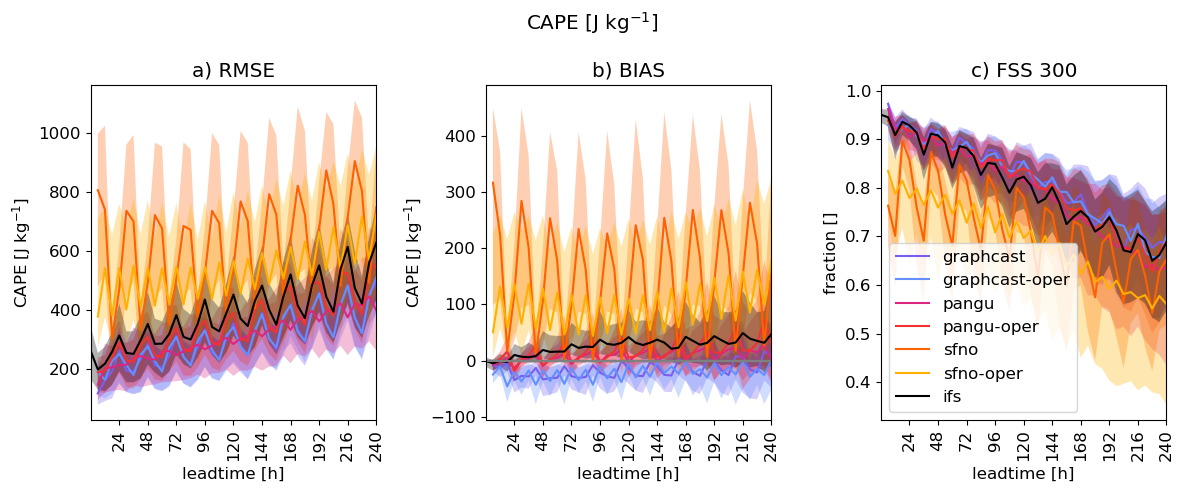

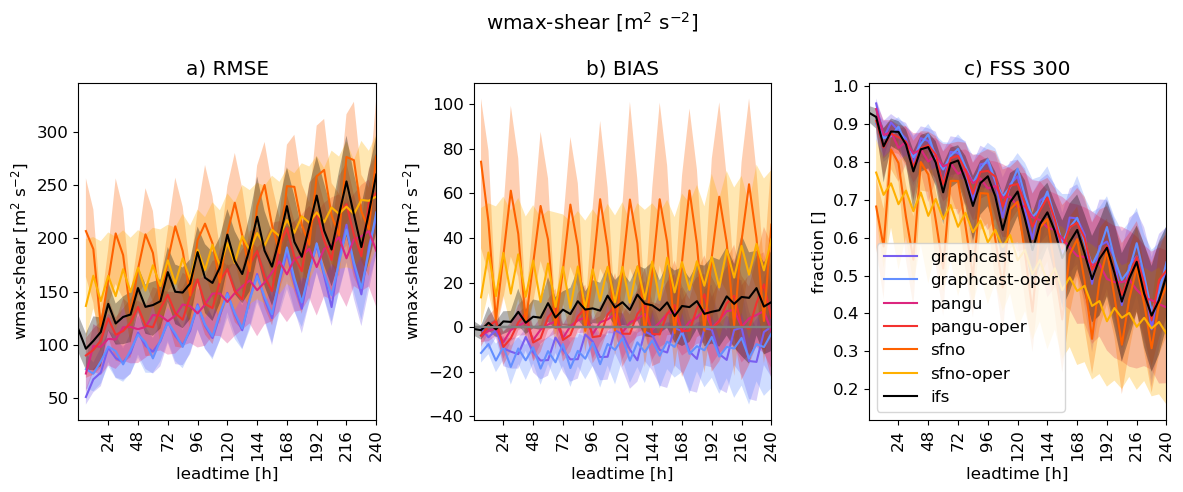

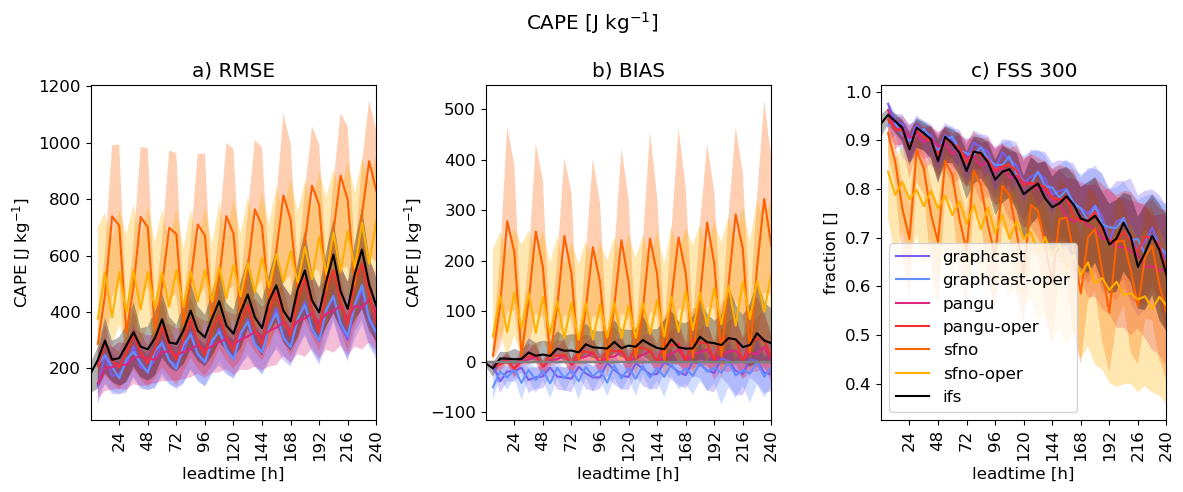

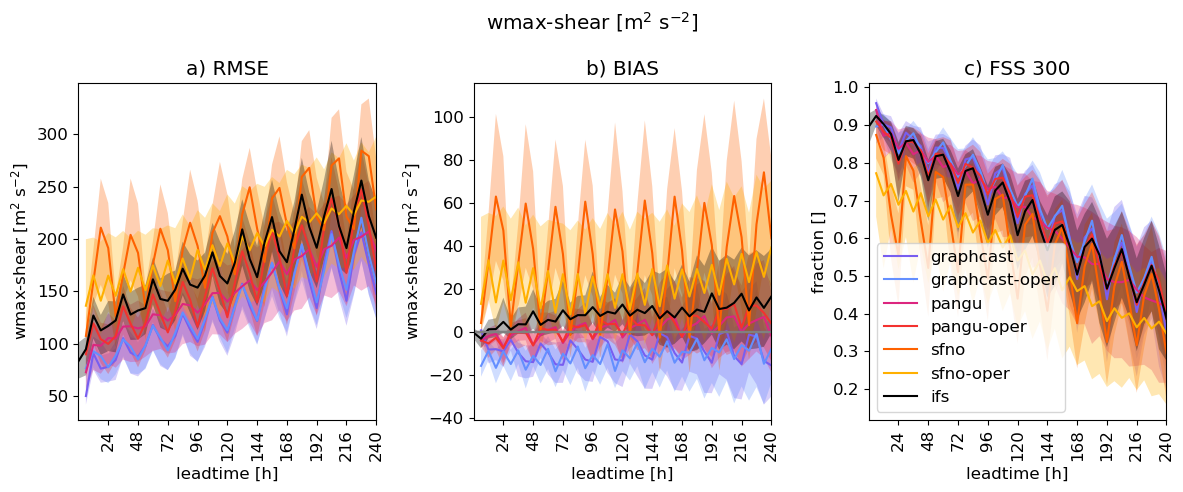

In [129]:
iis=[1,1,1,1,1,1,0]
times=[0,12]
for tt in range(len(times)):
    for mm in range(2)[:]:
        var=['cape','wms'][mm]
        tit=['CAPE [J kg$^{-1}$]','wmax-shear [m$^2$ s$^{-2}$]'][mm]
        l1=[300,300][mm]
        l2=[1000,500][mm]
        f1=[1,1,1,1,1][mm]
        fig,axes = plt.subplots(1,3,figsize=(12, 5))
        for nn in range(len(models))[:]:
            ii=iis[nn]
            model=models[nn]
            color=colors[nn]
            label=labels[nn]
            file=glob(datapath+model+var+'_eval_scores_lsm.nc')[0]
            scores=xr.open_dataset(file)#,engine='netcdf4')

            sal_s=scores.structure[:,tt1+tt:tt2:2]
            sal_a=scores.amplitude[:,tt1+tt:tt2:2]
            sal_l=scores.location[:,tt1+tt:tt2:2]

            rmse=scores.rmse[:,tt1+tt:tt2:2]
            bias=scores.bias[:,tt1+tt:tt2:2]
            fss_eval_300=scores.fss_low[:,tt1+tt:tt2:2]
            fss_eval_1000=scores.fss_high[:,tt1+tt:tt2:2]

            dt=scores.date
            ldt=len(scores.leadtime)

            
            

            axes[0].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(rmse,axis=1),c=color)
            axes[0].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(rmse,75,axis=1),
                                np.nanpercentile(rmse,25,axis=1),facecolor=color,alpha=0.3)
            axes[0].set_title('a) RMSE')
            axes[0].set_xlabel('leadtime [h]')
            axes[0].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
            axes[0].set_ylabel(tit)
            axes[0].set_xlim([0,240])
            
            axes[1].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(bias,axis=1),c=color)
            axes[1].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(bias,75,axis=1),
                                np.nanpercentile(bias,25,axis=1),facecolor=color,alpha=0.3)
            axes[1].set_title('b) BIAS')
            axes[1].plot([0,240],np.zeros(2),c='grey')
            axes[1].set_xlabel('leadtime [h]')
            axes[1].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
            axes[1].set_ylabel(tit)
            axes[1].set_xlim([0,240])

            axes[2].plot(np.arange(ii,ldt+ii)*6,np.nanmedian(fss_eval_300,axis=1),c=color,label=label)
            axes[2].fill_between(np.arange(ii,ldt+ii)*6,np.nanpercentile(fss_eval_300,75,axis=1),
                                np.nanpercentile(fss_eval_300,25,axis=1),facecolor=color,alpha=0.3)
            axes[2].set_title('c) FSS '+str(l1))
            axes[2].set_xlabel('leadtime [h]')
            axes[2].set_xticks(np.arange(24,258,24),labels=np.arange(24,258,24),rotation=90)
            axes[2].set_ylabel('fraction []')
            axes[2].set_xlim([0,240])
            axes[2].legend()
            fig.suptitle(tit)
        
        
        
        fig.tight_layout()
        fig.show()
        fig.savefig(figpath+var+'_'+str(times[tt]).zfill(2)+'h_sum_scores_prctl_all.png')
